# Using the distributions

In [1]:
from h5py import File
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import random
import itertools as it
import time
import joblib

In [2]:
EB_dist = joblib.load('EB_dist.sav')
#hh4b_dist = joblib.load('hh4b_dist.sav')
hh4b_dist = joblib.load('hh4b_dist_nofake.sav')
jz0_dist = joblib.load('jz0_dist.sav')
jz1_dist = joblib.load('jz1_dist.sav')
jz2_dist = joblib.load('jz2_dist.sav')
jz3_dist = joblib.load('jz3_dist.sav')
jz4_dist = joblib.load('jz4_dist.sav')
jz5_dist = joblib.load('jz5_dist.sav')
EB_multiplicities = joblib.load('EB_multiplicities.sav')
hh4b_multiplicities = joblib.load('hh4b_multiplicities.sav')
jz0_multiplicities = joblib.load('jz0_multiplicities.sav')
jz1_multiplicities = joblib.load('jz1_multiplicities.sav')
jz2_multiplicities = joblib.load('jz2_multiplicities.sav')
jz3_multiplicities = joblib.load('jz3_multiplicities.sav')
jz4_multiplicities = joblib.load('jz4_multiplicities.sav')
jz5_multiplicities = joblib.load('jz5_multiplicities.sav')

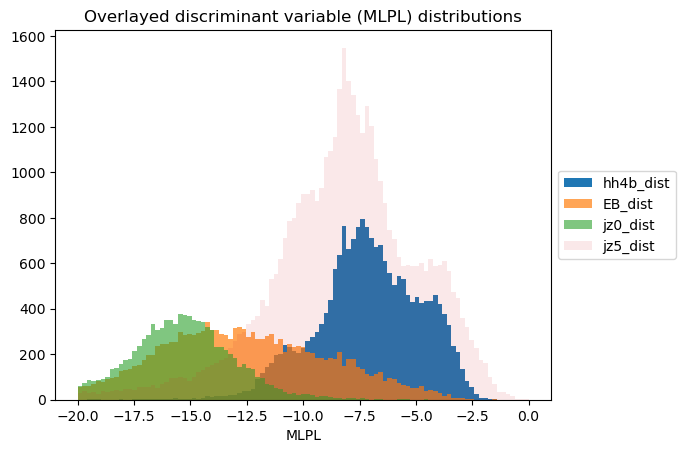

In [7]:
"""MLPL Overlayed Histograms"""
bins = np.linspace(-20, 0, 100)

plt.hist(hh4b_dist, bins, alpha=1, label='hh4b_dist')
plt.hist(EB_dist, bins, alpha=0.7, label='EB_dist')
plt.hist(jz0_dist, bins, alpha=0.6, label='jz0_dist')
#plt.hist(jz1_dist, bins, alpha=0.5, label='jz1_dist')
#plt.hist(jz2_dist, bins, alpha=0.4, label='jz2_dist')
#plt.hist(jz3_dist, bins, alpha=0.3, label='jz3_dist')
#plt.hist(jz4_dist, bins, alpha=0.2, label='jz4_dist')
plt.hist(jz5_dist, bins, alpha=0.1, label='jz5_dist')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed discriminant variable (MLPL) distributions")
plt.xlabel("MLPL")
plt.show()

In [8]:
print ("Ideally, we want to lose 0% (as small percentage as we can) of the signal and keep 0% (as small percentage as we can) of the backrground\n")
print("---------------------------\n")
cuts = [-20,-15,-14,-13,-12,-11,-10,-5,-1]
for i in cuts:
    print("For a " + str(i) + " MLPL cut we: \n" 
          "lose " + str((np.array(hh4b_dist) < i).sum() / len(hh4b_dist) * 100) + "% of the hh->4b signal\n"
          "lose " + str((np.array(EB_dist) < i).sum() / len(EB_dist) * 100) + "% of the EB_data sample\n"
          "keep " + str((np.array(jz0_dist) > i).sum() / len(jz0_dist) * 100) + "% of the dijet (jz0) background\n"
          "keep " + str((np.array(jz1_dist) > i).sum() / len(jz1_dist) * 100) + "% of the dijet (jz1) background\n"
          "keep " + str((np.array(jz2_dist) > i).sum() / len(jz2_dist) * 100) + "% of the dijet (jz2) background\n"
          "keep " + str((np.array(jz3_dist) > i).sum() / len(jz3_dist) * 100) + "% of the dijet (jz3) background\n"
          "keep " + str((np.array(jz4_dist) > i).sum() / len(jz4_dist) * 100) + "% of the dijet (jz4) background\n"
          "keep " + str((np.array(jz5_dist) > i).sum() / len(jz5_dist) * 100) + "% of the dijet (jz5) background\n"
          "______________________________________________________________________________________________________\n"
         )

Ideally, we want to lose 0% (as small percentage as we can) of the signal and keep 0% (as small percentage as we can) of the backrground

---------------------------

For a -20 MLPL cut we: 
lose 0.07574227428802262% of the hh->4b signal
lose 16.794413217509792% of the EB_data sample
keep 82.89198606271778% of the dijet (jz0) background
keep 79.08958740662756% of the dijet (jz1) background
keep 85.4460685483871% of the dijet (jz2) background
keep 92.42443028244104% of the dijet (jz3) background
keep 94.63037300978756% of the dijet (jz4) background
keep 94.60024654398168% of the dijet (jz5) background
______________________________________________________________________________________________________

For a -15 MLPL cut we: 
lose 0.24742476267420724% of the hh->4b signal
lose 39.425424402430025% of the EB_data sample
keep 35.81881533101045% of the dijet (jz0) background
keep 48.55366721812804% of the dijet (jz1) background
keep 73.33984375% of the dijet (jz2) background
keep 87.298832

In [17]:
"""Implementation of the ROC Curve"""

'Implementation of the ROC Curve'

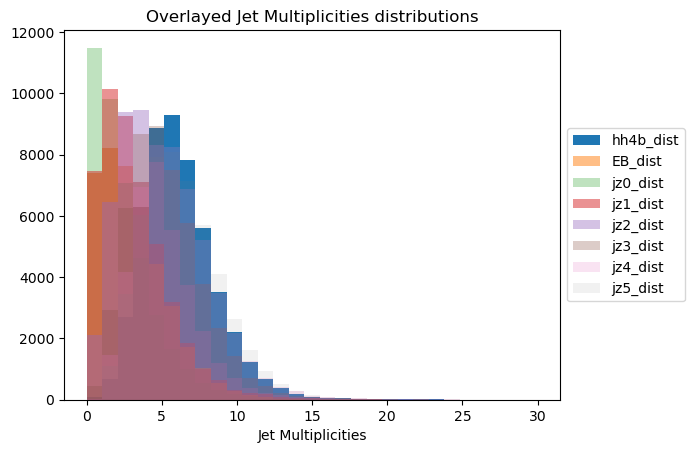

In [9]:
"""Jet Multiplicities Overlayed Histograms"""
bins = np.linspace(0, 30, 30)

plt.hist(hh4b_multiplicities, bins, alpha=1, label='hh4b_dist')
plt.hist(EB_multiplicities, bins, alpha=0.5, label='EB_dist')
plt.hist(jz0_multiplicities, bins, alpha=0.3, label='jz0_dist')
plt.hist(jz1_multiplicities, bins, alpha=0.5, label='jz1_dist')
plt.hist(jz2_multiplicities, bins, alpha=0.4, label='jz2_dist')
plt.hist(jz3_multiplicities, bins, alpha=0.3, label='jz3_dist')
plt.hist(jz4_multiplicities, bins, alpha=0.2, label='jz4_dist')
plt.hist(jz5_multiplicities, bins, alpha=0.1, label='jz5_dist')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Overlayed Jet Multiplicities distributions")
plt.xlabel("Jet Multiplicities")
plt.show()